# Gun Deaths in America

The data is from [FiveThirtyEight's _Gun Deaths in America_ project](https://github.com/fivethirtyeight/guns-data). Source: CDC.

Author: Ken Norton

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gun-Deaths-in-America" data-toc-modified-id="Gun-Deaths-in-America-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gun Deaths in America</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Age-distribution:-by-Race" data-toc-modified-id="Age-distribution:-by-Race-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Age distribution: by Race</a></span></li><li><span><a href="#Age-distribution:-Homicide" data-toc-modified-id="Age-distribution:-Homicide-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Age distribution: Homicide</a></span></li><li><span><a href="#Age-distribution:-Suicide" data-toc-modified-id="Age-distribution:-Suicide-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Age distribution: Suicide</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from pylab import rcParams
from scipy.stats import pearsonr

In [2]:
plt.style.use('seaborn-talk')
plt.style.use('fivethirtyeight')

In [3]:
guns = pd.read_csv('full_data.csv')
guns = pd.DataFrame.from_dict(guns)
guns.describe()

,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


In [4]:
guns.sample(5)

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
10507,10508,2012,12,Suicide,0,M,56.0,White,100,Home,Some college
98152,98153,2014,2,Suicide,0,M,67.0,Black,100,Home,HS/GED
73289,73290,2014,8,Suicide,0,F,50.0,White,100,Home,BA+
25899,25900,2012,2,Suicide,0,M,64.0,White,100,Home,HS/GED
21488,21489,2012,4,Suicide,0,M,30.0,White,100,Other unspecified,HS/GED


In [5]:
guns.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [6]:
guns_duplicates = guns.duplicated()
print('Number of duplicate entries: {}'.format(guns_duplicates.sum()))

Number of duplicate entries: 0


In [7]:
guns.isnull().sum()

Unnamed: 0       0
year             0
month            0
intent           1
police           0
sex              0
age             18
race             0
hispanic         0
place         1384
education     1422
dtype: int64

In [8]:
missing_age = pd.isnull(guns['age'])
guns[missing_age].head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN
8153,8154,2012,8,Suicide,0,F,NaN,White,998,Home,NaN
25596,25597,2012,11,Suicide,0,M,NaN,White,100,Other unspecified,Some college
35447,35448,2013,5,Homicide,0,M,NaN,White,998,Other specified,NaN
35448,35449,2013,5,Homicide,0,M,NaN,White,998,Other specified,NaN


In [9]:
missing_intent = pd.isnull(guns['intent'])
guns[missing_intent].head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
47994,47995,2013,4,NaN,0,M,27.0,White,100,NaN,BA+


In [10]:
guns.describe()

,Unnamed: 0,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000


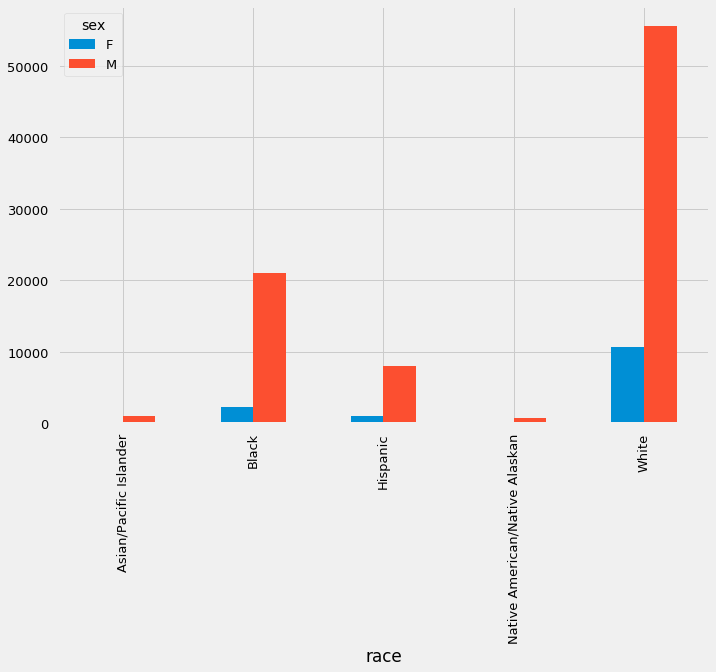

In [11]:
guns_clean = guns[['race', 'sex']].dropna()
guns_clean.groupby(['race', 'sex']).size().unstack(fill_value=0).plot.bar()

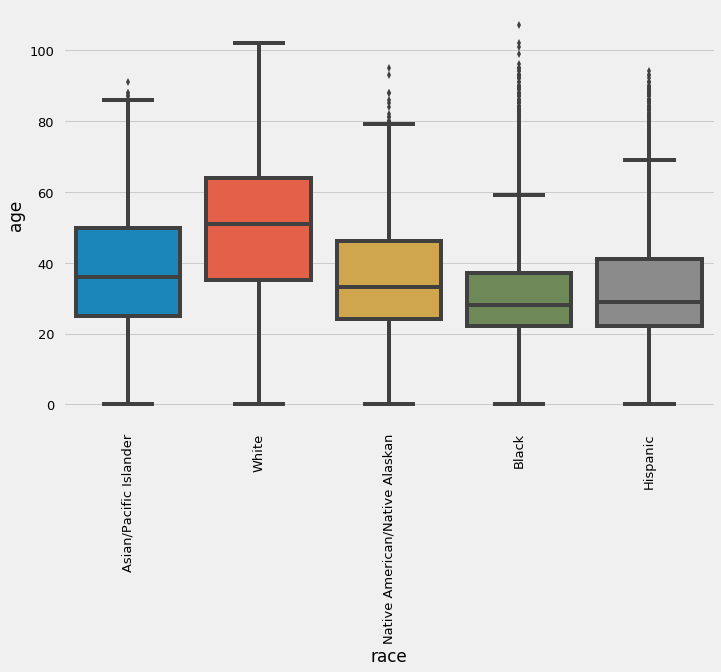

In [12]:
plt.xticks(rotation=90)
sns.boxplot(x='race', y='age', data=guns)

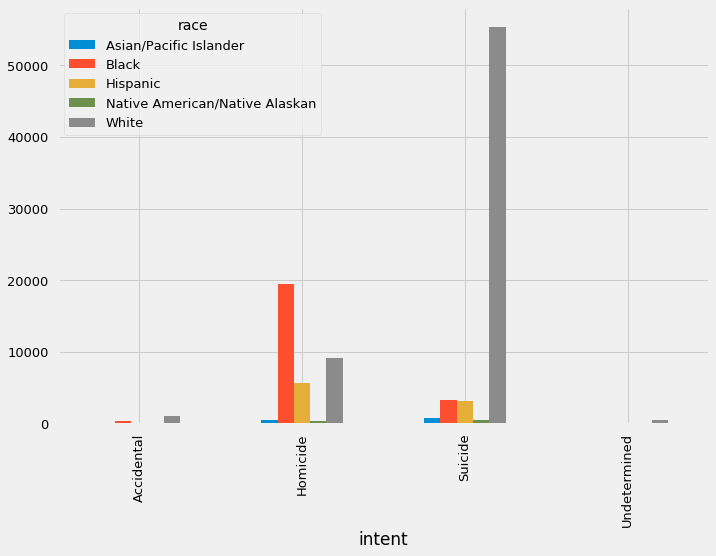

In [13]:
guns_clean = guns[['intent', 'race']].dropna()
guns_clean.groupby(['intent', 'race']).size().unstack(fill_value=0).plot.bar()

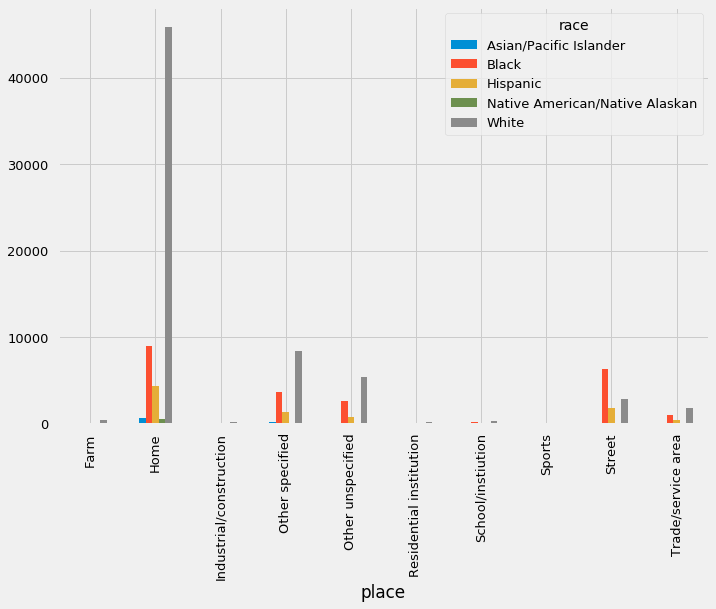

In [14]:
guns_clean = guns[['place', 'race']].dropna()
guns_clean.groupby(['place', 'race']).size().unstack(fill_value=0).plot.bar()

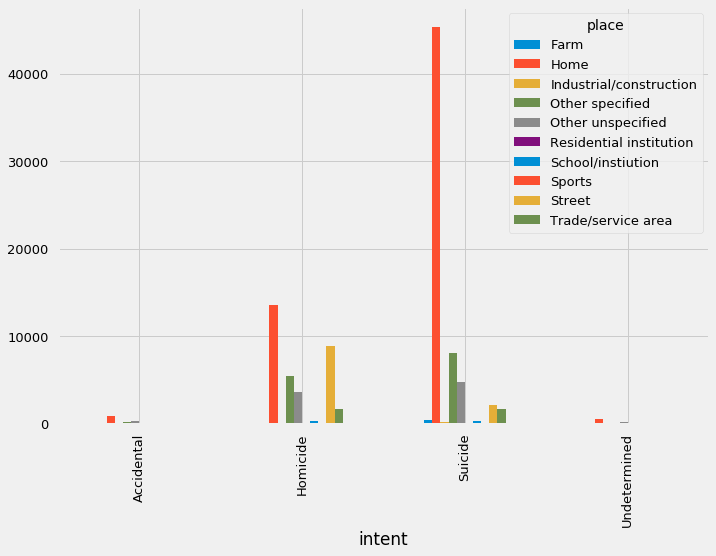

In [15]:
guns_clean = guns[['intent', 'place']].dropna()
guns_clean.groupby(['intent', 'place']).size().unstack(fill_value=0).plot.bar()

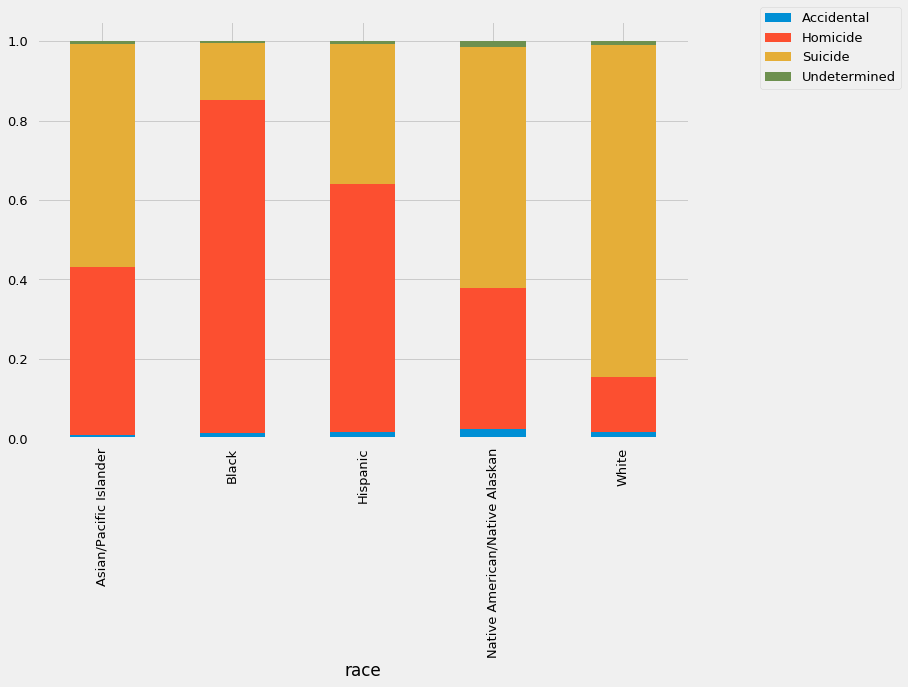

In [16]:
ax = guns.groupby('race')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

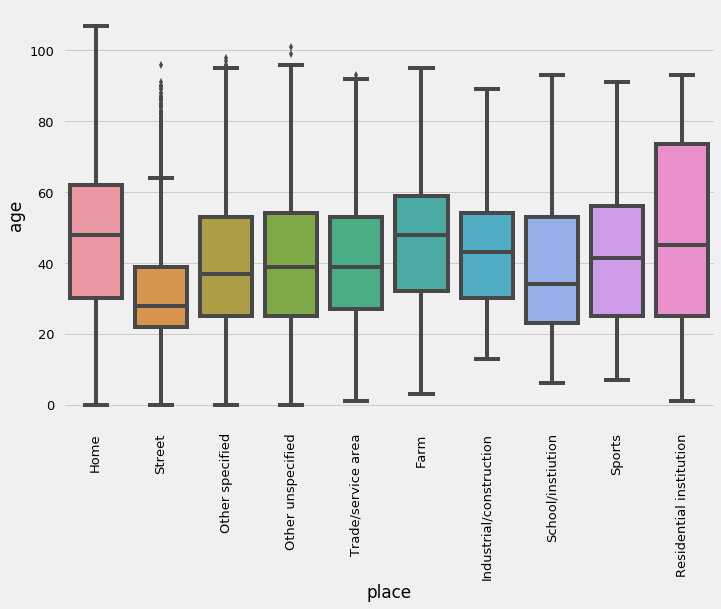

In [17]:
plt.xticks(rotation=90)
sns.boxplot(x='place', y='age', data=guns)

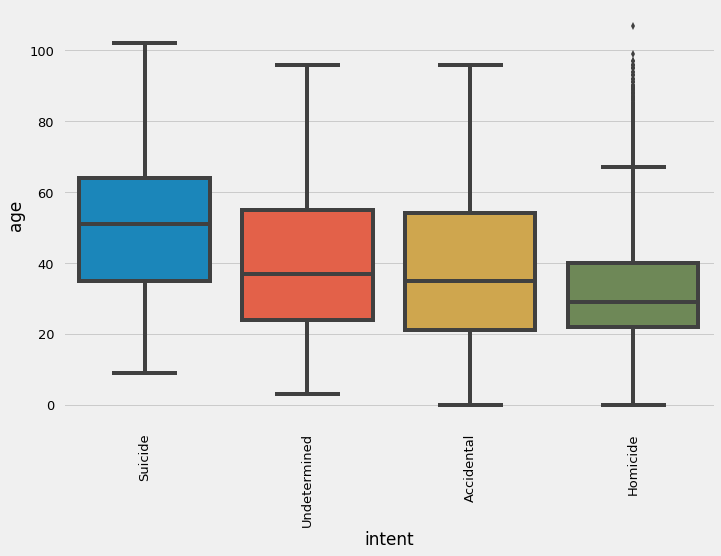

In [18]:
plt.xticks(rotation=90)
sns.boxplot(x='intent', y='age', data=guns)

### Age distribution: by Race

In [19]:
guns.race.unique()

array(['Asian/Pacific Islander', 'White',
       'Native American/Native Alaskan', 'Black', 'Hispanic'],
      dtype=object)

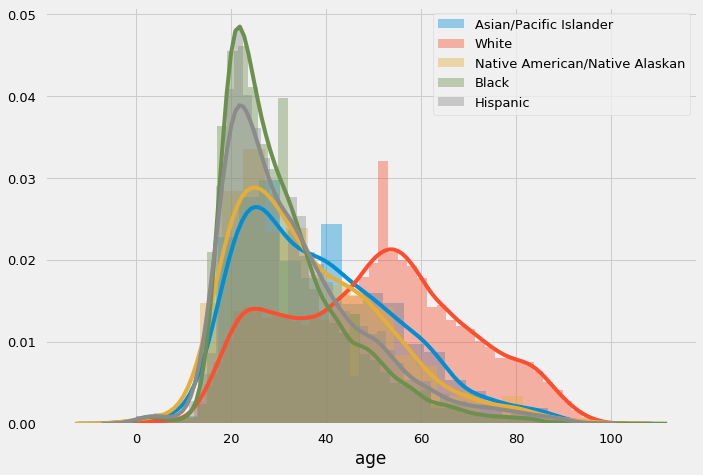

In [20]:
guns_filtered = guns[['race', 'age']].dropna()

for x in guns_filtered.race.unique():
    y = guns_filtered[guns_filtered['race'] == x]
    sns.distplot(y['age'], label = x)

plt.legend()
plt.show()


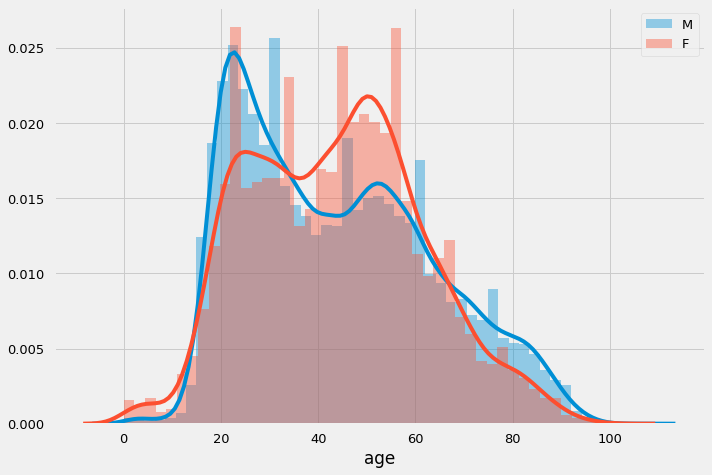

In [21]:
guns_filtered = guns[['sex', 'age']].dropna()

for x in guns_filtered.sex.unique():
    y = guns_filtered[guns_filtered['sex'] == x]
    sns.distplot(y['age'], label = x)

plt.legend()
plt.show()


(array([2.55958629e-04, 2.29480150e-04, 5.38395736e-04, 3.69374780e-03,
        9.09977056e-03, 1.44042925e-02, 1.35305027e-02, 1.28244099e-02,
        1.20874256e-02, 1.22771880e-02, 1.45587503e-02, 1.58385434e-02,
        2.46867684e-02, 2.00089038e-02, 1.88041330e-02, 1.44351840e-02,
        1.25199074e-02, 1.14784206e-02, 9.33807686e-03, 8.46870014e-03,
        7.67434578e-03, 5.09710717e-03, 2.44484621e-03, 7.06092769e-04,
        9.70877557e-05]),
 array([  0.  ,   4.08,   8.16,  12.24,  16.32,  20.4 ,  24.48,  28.56,
         32.64,  36.72,  40.8 ,  44.88,  48.96,  53.04,  57.12,  61.2 ,
         65.28,  69.36,  73.44,  77.52,  81.6 ,  85.68,  89.76,  93.84,
         97.92, 102.  ]),
 <a list of 25 Patch objects>)

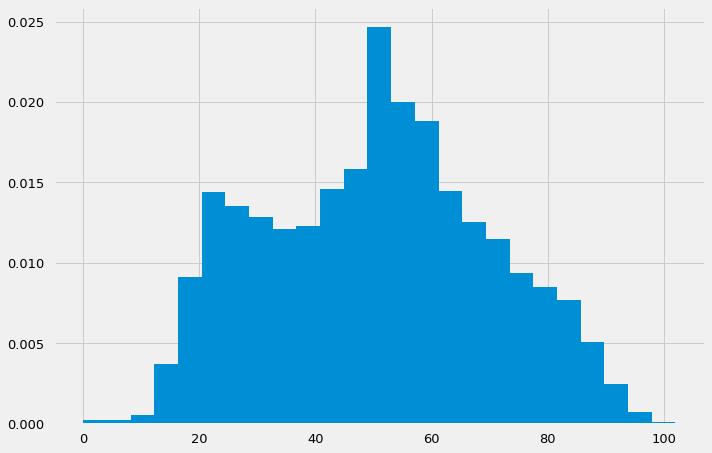

In [23]:
x = guns[(guns['race'] == 'White') & (guns['sex'] == 'M')]
x = x['age']
plt.hist(x, density=True, bins=25)

(array([6.57181862e-04, 3.11882917e-04, 4.90101727e-04, 1.17401641e-02,
        4.17923109e-02, 4.45881185e-02, 3.31598373e-02, 3.20905245e-02,
        1.86015883e-02, 1.28094770e-02, 1.15285293e-02, 7.64113148e-03,
        5.41339635e-03, 4.14358733e-03, 3.15224520e-03, 1.83788148e-03,
        1.11386756e-03, 1.04703551e-03, 6.79459213e-04, 4.67824376e-04,
        1.55941459e-04, 1.55941459e-04, 3.34160269e-05, 2.22773512e-05,
        1.11386756e-05]),
 array([  0.  ,   4.28,   8.56,  12.84,  17.12,  21.4 ,  25.68,  29.96,
         34.24,  38.52,  42.8 ,  47.08,  51.36,  55.64,  59.92,  64.2 ,
         68.48,  72.76,  77.04,  81.32,  85.6 ,  89.88,  94.16,  98.44,
        102.72, 107.  ]),
 <a list of 25 Patch objects>)

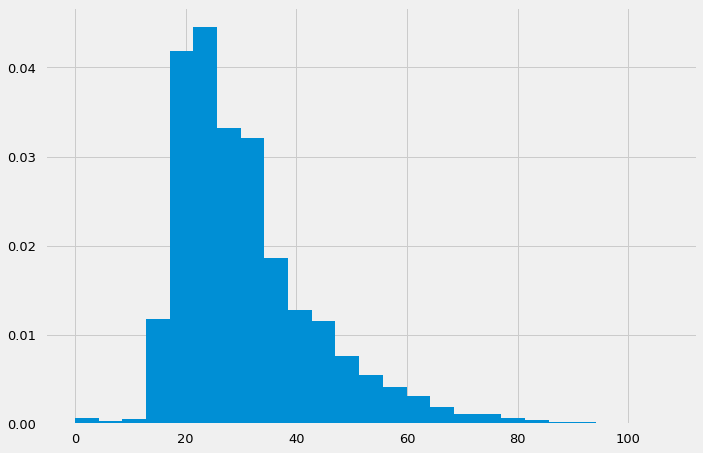

In [24]:
x = guns[(guns['race'] == 'Black') & (guns['sex'] == 'M')]
x = x['age']
plt.hist(x, density=True, bins=25)

### Age distribution: Homicide

(array([1.01651160e-03, 9.10209736e-04, 1.07630640e-03, 1.09955994e-02,
        3.68003776e-02, 3.87270989e-02, 3.02628128e-02, 3.08009660e-02,
        1.84101546e-02, 1.45102048e-02, 1.43906152e-02, 1.03777198e-02,
        7.46770616e-03, 5.79345175e-03, 4.63077508e-03, 2.59775187e-03,
        1.46829454e-03, 1.33541720e-03, 9.16853603e-04, 6.44455069e-04,
        3.05617868e-04, 1.39521200e-04, 5.31509335e-05, 6.64386669e-06,
        6.64386669e-06]),
 array([  0.  ,   4.28,   8.56,  12.84,  17.12,  21.4 ,  25.68,  29.96,
         34.24,  38.52,  42.8 ,  47.08,  51.36,  55.64,  59.92,  64.2 ,
         68.48,  72.76,  77.04,  81.32,  85.6 ,  89.88,  94.16,  98.44,
        102.72, 107.  ]),
 <a list of 25 Patch objects>)

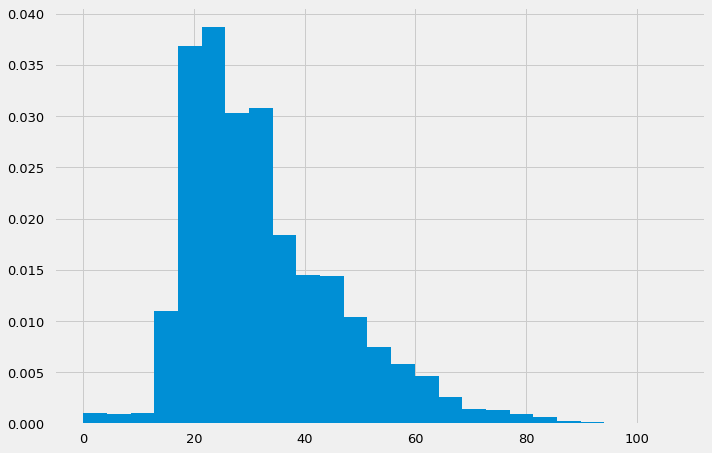

In [25]:
x = guns[['intent', 'age']].dropna()
x = guns[guns['intent'] == 'Homicide']
x = x['age']
plt.hist(x, density=True, bins=25)

### Age distribution: Suicide

(array([3.10658180e-04, 4.14920172e-03, 9.81339401e-03, 1.20220460e-02,
        1.55201422e-02, 1.43583657e-02, 1.36647043e-02, 1.03070426e-02,
        1.48179696e-02, 1.67797973e-02, 1.48179696e-02, 2.25376126e-02,
        2.24822899e-02, 2.03417274e-02, 1.18858671e-02, 1.39711069e-02,
        1.27454966e-02, 8.14945774e-03, 9.17931088e-03, 8.63885076e-03,
        6.65148953e-03, 3.20871600e-03, 1.91501618e-03, 5.06415389e-04,
        4.25559151e-05]),
 array([  9.  ,  12.72,  16.44,  20.16,  23.88,  27.6 ,  31.32,  35.04,
         38.76,  42.48,  46.2 ,  49.92,  53.64,  57.36,  61.08,  64.8 ,
         68.52,  72.24,  75.96,  79.68,  83.4 ,  87.12,  90.84,  94.56,
         98.28, 102.  ]),
 <a list of 25 Patch objects>)

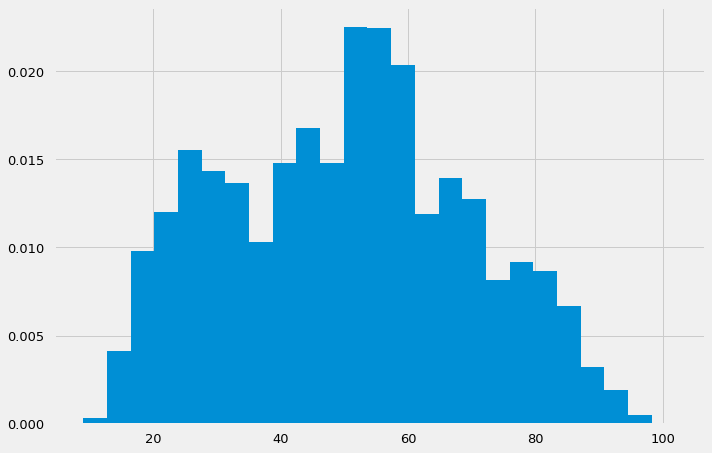

In [26]:
x = guns[['intent', 'age']].dropna()
x = guns[guns['intent'] == 'Suicide']
x = x['age']
plt.hist(x, density=True, bins=25)

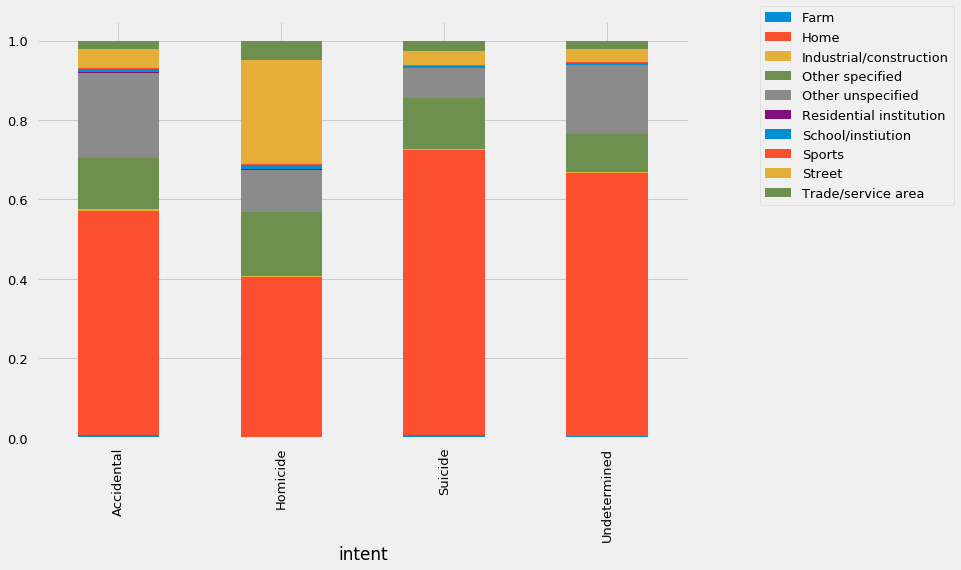

In [27]:
ax = guns.groupby('intent')['place'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

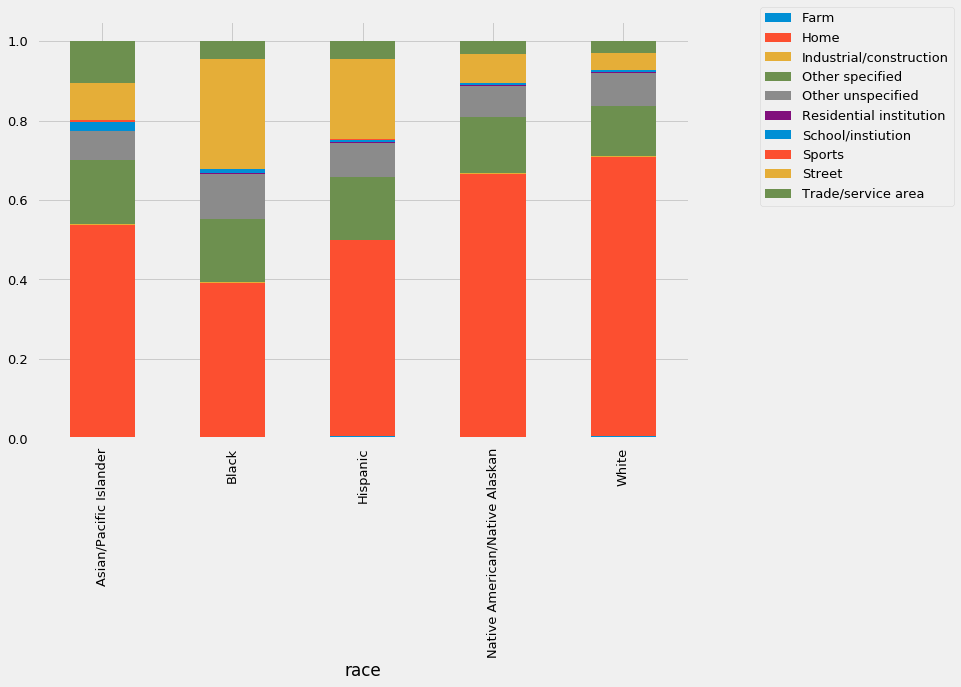

In [28]:
ax = guns.groupby('race')['place'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

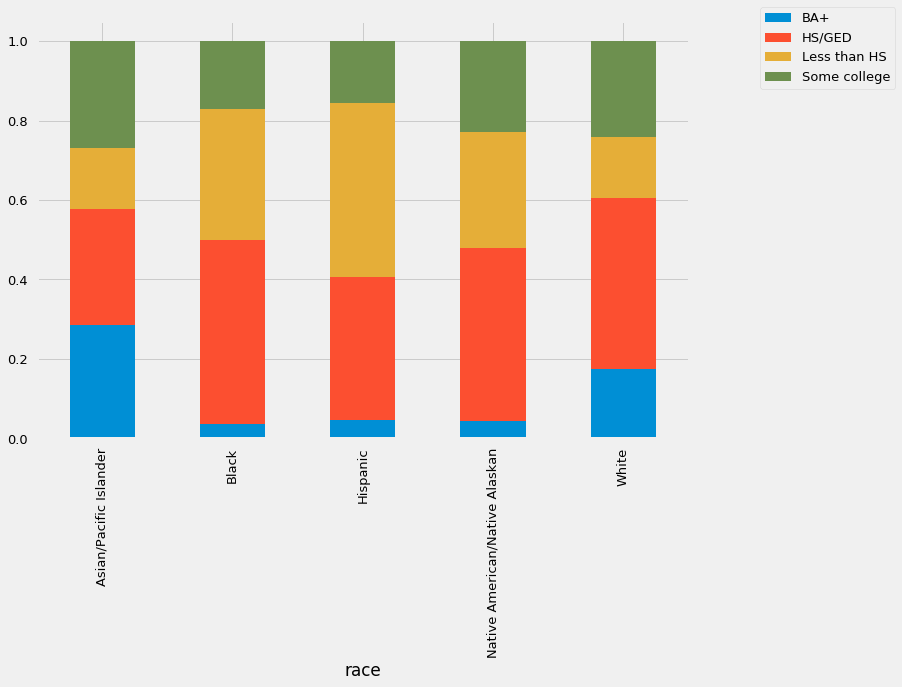

In [29]:
ax = guns.groupby('race')['education'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

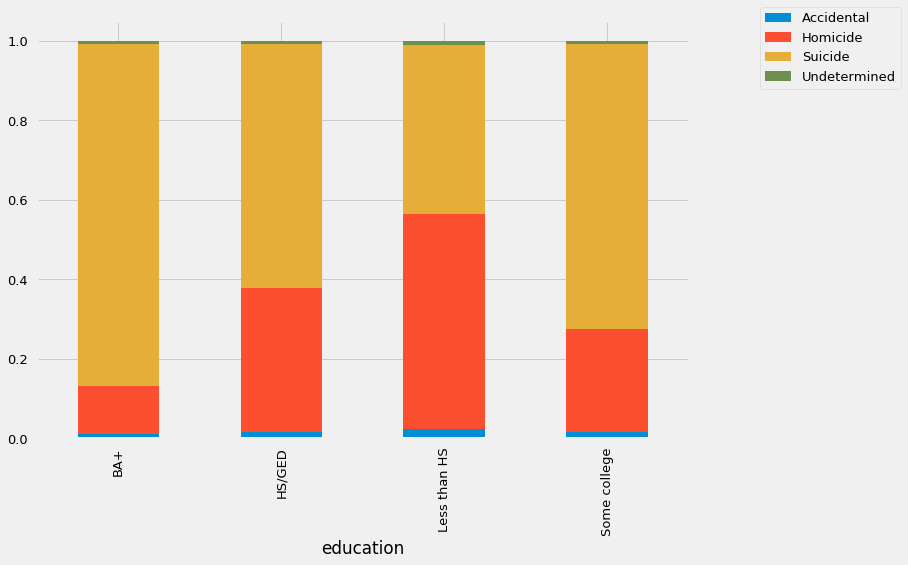

In [30]:
ax = guns.groupby('education')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

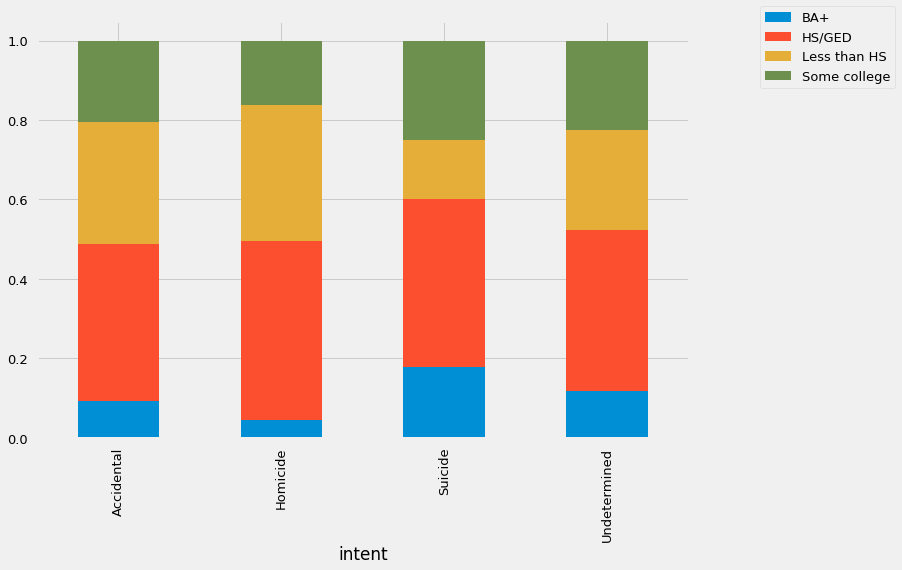

In [31]:
ax = guns.groupby('intent')['education'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

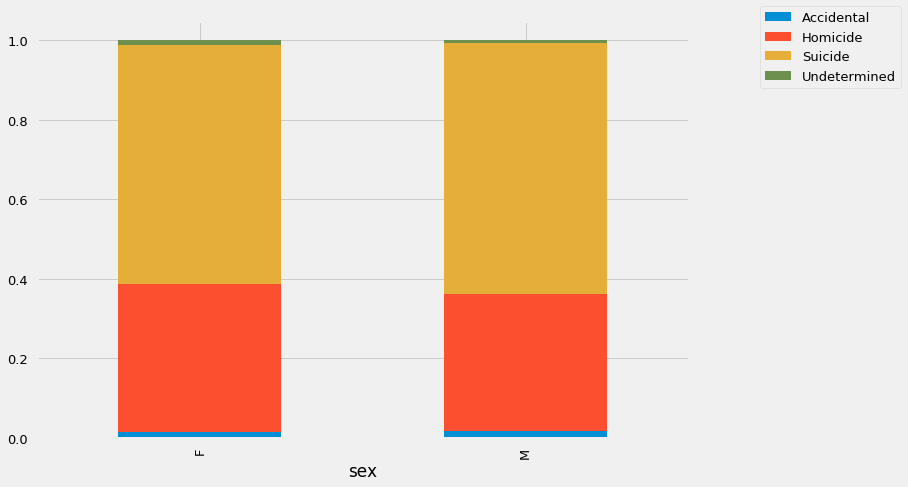

In [32]:
ax = guns.groupby('sex')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

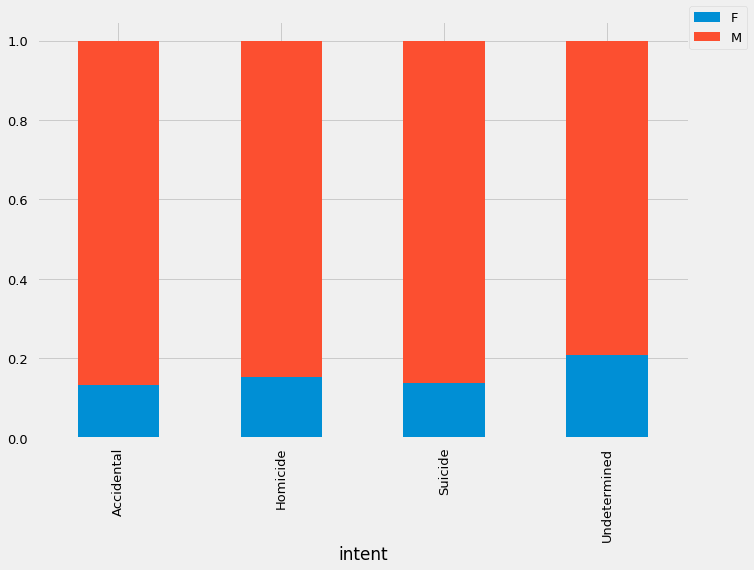

In [33]:
ax = guns.groupby('intent')['sex'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

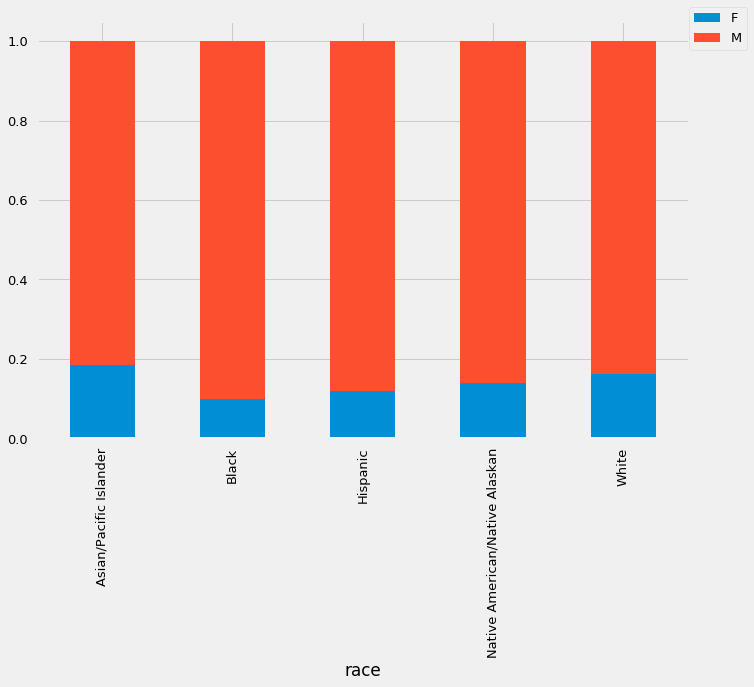

In [34]:
ax = guns.groupby('race')['sex'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

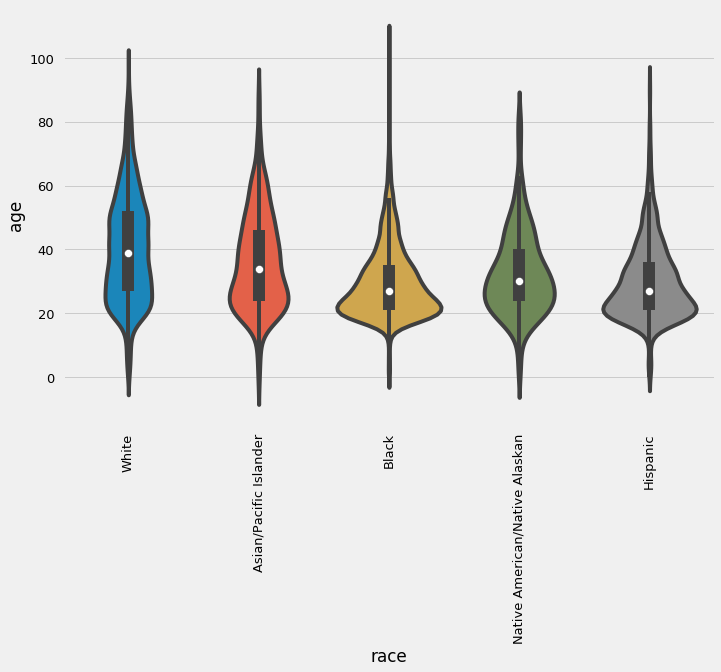

In [35]:
plt.xticks(rotation=90)
sns.violinplot(x="race", y="age", data=guns[guns['intent'] == 'Homicide'])

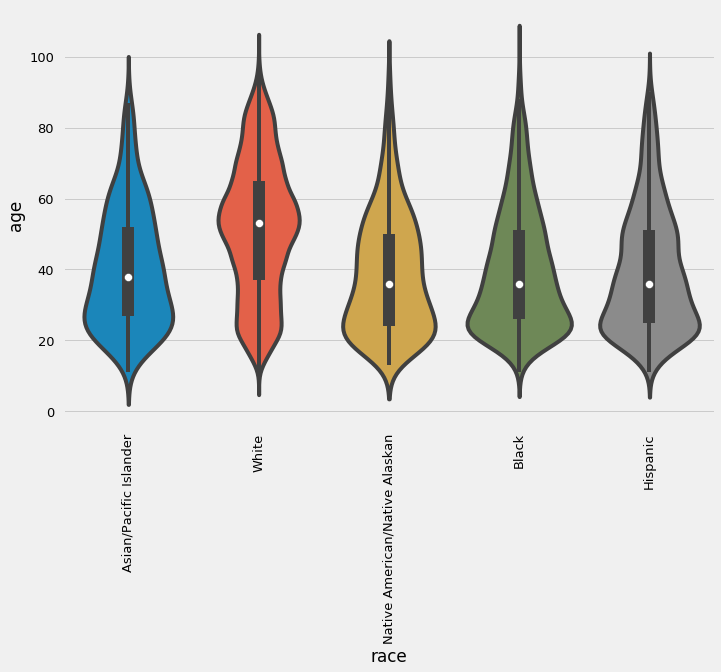

In [36]:
plt.xticks(rotation=90)
sns.violinplot(x="race", y="age", data=guns[guns['intent'] == 'Suicide'])